<a href="https://colab.research.google.com/github/MohammadForouhesh/Emotion-Detection/blob/main/exa_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U sentence-transformers

     |████████████████████████████████| 85 kB 2.2 MB/s 
     |████████████████████████████████| 2.6 MB 27.3 MB/s 
     |████████████████████████████████| 1.2 MB 59.4 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 895 kB 57.6 MB/s 
     |████████████████████████████████| 3.3 MB 56.0 MB/s 
     |████████████████████████████████| 636 kB 24.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=3aae89df030d3ef6845ea282fa584a03a667ec99a70f3d45727334bc94a16bf8
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
! wget https://raw.githubusercontent.com/kharazi/persian-stopwords/master/persian

--2021-08-22 08:08:56--  https://raw.githubusercontent.com/kharazi/persian-stopwords/master/persian
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14933 (15K) [text/plain]
Saving to: ‘persian.1’

persian.1           100%[===================>]  14.58K  --.-KB/s    in 0s      

2021-08-22 08:08:56 (94.4 MB/s) - ‘persian.1’ saved [14933/14933]



In [ ]:
from sentence_transformers import SentenceTransformer
emb_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = ["من یادگیری ماشین را دوست دارم"]
sentence_embeddings = emb_model.encode(sentences)


# Exploratory

In [ ]:

import pandas as pd
train_df = pd.read_csv('Emotion.csv')

file = open('persian', 'r')
sw_persian = list(file.read().splitlines())
test_df = pd.read_csv('EmotionTest.csv')

In [ ]:
df = train_df.append(test_df)

In [ ]:
df['category_id'] = df['label'].factorize()[0]
from io import StringIO
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [ ]:
id_to_category

{0: '0. 0. 0. 0. 0. 0. 0. 0. 0. 1.\n',
 1: '1. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n',
 2: '0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n',
 3: '0. 1. 0. 0. 1. 0. 0. 0. 0. 0.\n',
 4: '0. 0. 0. 0. 0. 0. 1. 0. 0. 0.\n',
 5: '0. 0. 1. 0. 1. 0. 0. 0. 0. 0.\n',
 6: '0. 0. 1. 0. 0. 0. 0. 0. 0. 0.\n',
 7: '0. 0. 0. 1. 0. 0. 0. 0. 0. 1.\n',
 8: '0. 0. 1. 1. 0. 0. 0. 0. 0. 0.\n',
 9: '0. 0. 0. 0. 1. 0. 0. 0. 0. 0.\n',
 10: '0. 0. 0. 0. 0. 0. 1. 0. 0. 1.\n',
 11: '0. 1. 0. 1. 0. 0. 0. 0. 0. 0.\n',
 12: '0. 0. 0. 0. 0. 1. 0. 0. 0. 0.\n',
 13: '0. 0. 0. 0. 0. 0. 0. 1. 0. 1.\n',
 14: '0. 0. 0. 1. 1. 0. 0. 0. 0. 0.\n',
 15: '0. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n',
 16: '0. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n',
 17: '0. 0. 0. 0. 0. 0. 0. 0. 1. 1.\n',
 18: '0. 0. 1. 0. 0. 0. 1. 0. 0. 0.\n',
 19: '0. 0. 0. 0. 0. 1. 0. 0. 0. 1.\n',
 20: '0. 0. 0. 1. 0. 0. 1. 0. 0. 0.\n',
 21: '0. 1. 0. 0. 0. 0. 1. 0. 0. 0.\n',
 22: '0. 0. 0. 0. 0. 0. 1. 1. 0. 0.\n',
 23: '0. 0. 0. 0. 1. 0. 0. 0. 1. 0.\n',
 24: '0. 0. 0. 0. 1. 0. 1. 0. 0. 0.\n',
 25: '0. 0

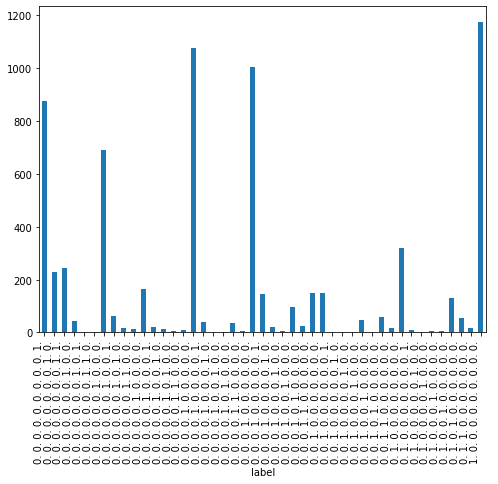

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()


# Preprocessing

In [ ]:
def correction(series):
    for line in series:
        line = line.replace('\n', '').replace('.', '')
        line = line.split(' ')

        yield list(map(int, line))

df.label = list(correction(df.label))
df

,text,label,category_id
0,قبلا میگفتن اگه درس نخونی معلم میزندت، الان در...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0
1,یه شات هست از کلاب‌هاوس که هی توییت و لایک و ک...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0
2,ایران انقده خوبه که اصن همه میدونن منو بفرستین...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1
3,رد پای من هر جا بری هس.,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2
4,#علی_جوانمردیآقای #علی‌جوانمردی؛در این‌که شما ...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]",3
...,...,...,...
995,تنها کشورهای وحشی و عقب مانده شعار مرگ بر کشور...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0
996,حق با شما و اون دوست عزیز 🌷🌷,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",9
997,قیمت دستته آفرین، معلومه خیلی سرت کلاه گذاشتن,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2
998,شب پر استرسی بود واقعا,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",25


In [ ]:
train_df = df[:5999]
test_df = df[5999:]

In [ ]:
import re
def remove_emoji(text:str) ->str:
    
    emoji_pattern = re.compile(pattern="["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F1E6-\U0001F1FF"
                              u"\U00002700-\U000027BF"
                              u"\U0001F900-\U0001F9FF"
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F680-\U0001F6FF"
                              u"\U00002600-\U000026FF"
                              "]+", flags=re.UNICODE)
    
    return str(emoji_pattern.sub(r'', text))


def remove_redundent_characters(text:str) -> str:
    text = re.sub(r'@[A-Za-z0-9]+' , ' ', text)            #Removed @mentions
    text = re.sub(r'_[A-Za-z0-9]+' , ' ', text)            #Removed underlines
    text = re.sub(r'/(\r\n)+|\r+|\n+|\t+/' , ' ', text)    #Removed \n
    text = re.sub(r'#', ' ' , text)                        #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', ' ' , text)                  #Removing RT
    text = re.sub(r'https?:\/\/\S+' , ' ' , text)          #Remove the hyper link
    text = re.sub(r'\([ا-ی]{1,3}\)' , ' ' , text)           #Remove abbreviations
    text = re.sub(r"[\(\)]", " ", text)                   # remove parantesis
    text = re.sub(r"\d|[۰-۹]"," ", text)
    text = re.sub(r"&|:"," ", text)
    text = re.sub(r"[A-Za-z]"," ", text)
    text = re.sub(r"[0-9]"," ", text)
    text = re.sub(r"\"", " ",text)
    text = re.sub(r"\'", " ",text)
    text = re.sub(r"_", " ",text)
    text = re.sub(r"@|=", " ",text)
    text = re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ",text)
    text = re.sub(r"{|}|;|\[|\]|\||؟|!|\+|\-|\*|\$", " ",text)
    text = re.sub(r"¹²|\/", " ",text)
    text = re.sub(r"»|>|<|«|,|؛|،|%|؟", " ",text)
    text = re.sub("\.|\^|,", " ",text)
    return text


def remove_stop_words(text:str) -> str:
    return ' '.join([word for word in text.split(' ') if word not in sw_persian])


#def lemmatization(text:str) -> str:
#    
#    #create object
#    normalizer = Normalizer(statistical_space_correction=True, date_normalizing_needed=True)
#    tokenizer = Tokenizer()
#    stemmer = FindStems()
#    
#    #tokenizing and normalizing the sentence
#    TokenNormalWords = tokenizer.tokenize_words(normalizer.normalize(text))
#    
#    #stemming the words of sentence
#    #Remove &
#    #Join the split sentence
#    lemma = []
#    for word in TokenNormalWords:
#        lemma.append(re.sub("&.*", "", stemmer.convert_to_stem(word)))
#    return " ".join(lemma)

#formalize = hazm.InformalNormalizer()

#def formalizer(text:str) -> str:
#    return ' '.join([formalize.normalized_word(word)[0] for word in text.split(" ")])

In [ ]:
def preprocess(sentence:str) -> str:
    return remove_stop_words(
            remove_redundent_characters(
                remove_emoji(sentence)))

In [ ]:
train_df['preprocessed'] = train_df.text.apply(preprocess)
train_df

,text,label,category_id,preprocessed
0,قبلا میگفتن اگه درس نخونی معلم میزندت، الان در...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0,میگفتن درس نخونی معلم میزندت درس بخونی نخونی ...
1,یه شات هست از کلاب‌هاوس که هی توییت و لایک و ک...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0,شات کلاب‌هاوس توییت لایک کوت می‌شه هربار می‌بی...
2,ایران انقده خوبه که اصن همه میدونن منو بفرستین...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,ایران انقده خوبه اصن میدونن منو بفرستین خارج
3,رد پای من هر جا بری هس.,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,رد پای بری هس
4,#علی_جوانمردیآقای #علی‌جوانمردی؛در این‌که شما ...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]",3,علی جوانمردیآقای علی‌جوانمردی این‌که شخصیت ت...
...,...,...,...,...
995,تنها کشورهای وحشی و عقب مانده شعار مرگ بر کشور...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",0,کشورهای وحشی مانده شعار مرگ کشور می‌دهند میه...
996,حق با شما و اون دوست عزیز 🌷🌷,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",9,دوست عزیز
997,قیمت دستته آفرین، معلومه خیلی سرت کلاه گذاشتن,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2,قیمت دستته آفرین سرت کلاه گذاشتن
998,شب پر استرسی بود واقعا,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",25,شب پر استرسی


# Sentence Embedding

In [ ]:
sentences = list(train_df.preprocessed)
sentence_embeddings = emb_model.encode(sentences)

# Torch DataSet

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [ ]:
inputs = torch.from_numpy(sentence_embeddings).to(device)
target = torch.LongTensor(train_df.category_id)
len(target)

ValueError: ignored

In [ ]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(train_ds, test_size=0.05, random_state=84)

In [ ]:
from torch.utils.data import DataLoader
bach_size = 5
train_dl = DataLoader(X_train, bach_size, shuffle=True)
val_dl = DataLoader(X_val, bach_size, shuffle=True)

# Train

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=384, hidden_layer_size=150, output_size=10):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=1)
        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.rand(1, 1, self.hidden_layer_size).to(device),
                            torch.rand(1, 1, self.hidden_layer_size).to(device))
        
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))

        return predictions

In [ ]:
lstm_model = LSTM(output_size=df.category_id.nunique()).to(device) #
loss_function = nn.CrossEntropyLoss()
# loss_function = nn.MSELoss()
# loss_function = nn.L1Loss()
# loss_function = nn.SmoothL1Loss(reduction='sum')
# loss_function = nn.PairwiseDistance(p=2, eps=0)

#nn.ReLU
# optimizer = torch.optim.SGD(lstm_model.parameters(), lr=3)
optimizer = torch.optim.AdamW(lstm_model.parameters(), amsgrad=True)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.000001)

In [ ]:
epochs = 75
training_loss = 0
threshold = 0.2

for i in range(epochs):
    training_loss = 0
    lstm_model.train()
    for seq, label in train_dl:
        optimizer.zero_grad()
        lstm_model.hidden_cell = (torch.rand(1, 1, lstm_model.hidden_layer_size).to(device), 
                                  torch.rand(1, 1, lstm_model.hidden_layer_size).to(device))
        
        y_pred = lstm_model(seq)
        single_loss = loss_function(y_pred, label)
        training_loss += single_loss.item()
        single_loss.backward()
        optimizer.step()

    validation_loss = 0
    lstm_model.eval()
    for seq_test, label_test in val_dl:
        pred_test = lstm_model(seq_test)
        
        val_loss = loss_function(pred_test, label_test)
        validation_loss += val_loss.item()

    if i%10 == 1:
        print(f'epoch: {i:3} \t'
              f'loss: {training_loss/len(train_dl):10.8f} \t'
              f'Val Loss: {validation_loss/len(val_dl):10.8f}')
            
print(f'epoch: {i:3} loss: {single_loss.item():10.10f} val loss: {val_loss.item():10.10f}')

In [ ]:
# https://monkeylearn.com/text-classification/

In [ ]:
# recall = correct_true / target_true
# precision = correct_true / predicted_true
# f1_score = 2 * precission * recall / (precision + recall)

In [ ]:
! pip install pytorch-ignite

In [ ]:
from ignite.metrics import Precision, Recall, Accuracy

precision = Precision()
recall = Recall()
acc = Accuracy()

# Start accumulation:
for seq, label in train_dl:
    y_pred = lstm_model(seq)
    precision.update((y_pred, label))
    recall.update((y_pred, label))
    acc.update((y_pred, label))

print("Precision: ", precision.compute(), '\n', precision.compute().mean(), '\n')
print("Recall: ", recall.compute(), '\n', recall.compute().mean(), '\n')
print("Accuracy : ", acc.compute(), '\n')
print("Confusion Matrix: ", )

# Test


In [ ]:
test_df['preprocessed'] = test_df.text.apply(preprocess)

sentences = list(test_df.preprocessed)
sentence_embeddings = emb_model.encode(sentences)

inputs = torch.from_numpy(sentence_embeddings).to(device)
target = torch.LongTensor(test_df.category_id)

test_ds = TensorDataset(inputs, target)

test_dl = DataLoader(test_ds, bach_size, shuffle=True)


In [ ]:
precision = Precision()
recall = Recall()
acc = Accuracy()

# Start accumulation:
for seq, label in test_dl:
    y_pred = lstm_model(seq)
    precision.update((y_pred, label))
    recall.update((y_pred, label))
    acc.update((y_pred, label))

print("Precision: ", precision.compute(), '\n', precision.compute().mean(), '\n')
print("Recall: ", recall.compute(), '\n', recall.compute().mean(), '\n')
print("Accuracy : ", acc.compute(), '\n')

# CNN

In [ ]:
bach_size = 1
train_dl = DataLoader(train_ds, bach_size, shuffle=True)

In [ ]:
import torch.nn.functional as F
train_iterator = train_dl
trick_f = lambda tensor: tensor.permute(1, 0)\
                               .unsqueeze(-1)\
                               .expand(384, bach_size, 4)\
                               .unsqueeze(-1)\
                               .expand(384, bach_size, 4, 100)

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size=384, embedding_dim=100, n_filters=384, 
                 filter_sizes=[2, 3, 4], output_dim=42, drop_out=0.5, pad_idx=2):
        super().__init__()
        self.convs = nn.ModuleList([
                    nn.Conv2d(in_channels=bach_size,
                              out_channels=n_filters,
                              kernel_size=(fs, embedding_dim)) 
                    for fs in filter_sizes])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.linear = nn.Linear(output_dim, 1)
        self.dropout = nn.Dropout(drop_out)

    def forward(self, text):
        embedded = trick_f(text)
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        out_matrix = self.fc(cat)
        return self.linear(out_matrix).permute(1, 0)

In [ ]:
# https://arxiv.org/abs/1408.5882

In [ ]:
cnn_model = CNN(output_dim=df.category_id.nunique()).to(device)

optimizer = torch.optim.Adam(cnn_model.parameters())
loss_function = nn.CrossEntropyLoss()
loss_function = loss_function.to(device)

In [ ]:
def categorical_acc(preds, label):
    max_preds = preds.argmax(dim=1, keepdim=True)
    correct = max_preds.squeeze(1).eq(label)
    return correct.sum() / torch.FloatTensor([label.shape[0]])

In [ ]:
def train(model, iterator, optimizer, criterion=loss_function):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for seq, label in iterator:
        optimizer.zero_grad()
        preds = model(seq)
        loss = criterion(preds, label)
        acc = categorical_acc(preds, label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion=loss_function):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for seq, label in iterator:
            preds = model(seq)
            loss = criterion(preds, label)
            acc = categorical_acc(preds, label) 
            optimizer.step()
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time
def time_per_epoch(st, et):
    elt = et - st
    elasp_min = int(elt/60)
    elasp_sec = int(elt - elasp_min*60)
    return elasp_min, elasp_sec

In [ ]:
N_EPOCH = 300
best_validation_loss = float('inf')

for epoch in range(N_EPOCH):
    start_time = time.time()
    train_loss, train_acc = train(cnn_model, train_iterator, optimizer, 
                                  criterion=loss_function)

    valid_loss, valid_acc = evaluate(cnn_model, train_iterator, 
                                  criterion=loss_function)
    end_time = time.time()
    epoch_mins, epoch_secs = time_per_epoch(start_time, end_time)

    if valid_loss < best_validation_loss:
        best_validation_loss = valid_loss
        torch.save(cnn_model.state_dict(), 'exa_emotion_classification.pt')

    print(f'Epoch {epoch + 1}, Time: {epoch_mins} mins: {epoch_secs} secs')
    print(f'\t Train Loss {train_loss:.3f}, Train Acc {train_acc*100:.3f}')
    print(f'\t Valid Loss {valid_loss:.3f}, Valid Acc {valid_acc*100:.3f}')

In [ ]:
from ignite.metrics import Precision, Recall, Accuracy

precision = Precision()
recall = Recall()
acc = Accuracy()

# Start accumulation:
for seq, label in train_dl:
    y_pred = cnn_model(seq)
    precision.update((y_pred, label))
    recall.update((y_pred, label))
    acc.update((y_pred, label))

print("Precision: ", precision.compute(), '\n', precision.compute().mean(), '\n')
print("Recall: ", recall.compute(), '\n', recall.compute().mean(), '\n')
print("Accuracy : ", acc.compute(), '\n')
print("Confusion Matrix: ", )